I am Amir Wilson and this is my Spotify Data Report revision. I love music and it is an easy and effective way to connect with people so I love that music was such a big part of this project. I believe there is a direct correlation between the "energy" track feature and the "popularity" track feature, making songs with more energy more popular. Higher energy songs are easier to dance to and for a lot of people easy to share and grasp. I believe this can be shown by using two of the first albums that came to my mind, and Spotify homepage :D, Graduation by Kanye West and Beauty Behind the Madness by The Weeknd. These two albums could be good choices because there is a decent bit of variety in the energy of the tracks for both albums.

In [1]:
import pandas as pd
import json
import requests
import base64
import urllib
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf

App key allows me to see the Client ID and the Client Secret through the text file

In [2]:
app_key = pd.read_csv(r"Client_ID,Client_Secret.txt")

Defining app_id as the first value of Client_ID and app_token to the first value of Client_Secret

In [3]:
app_id = app_key['Client_ID'].iloc[0]
app_token = app_key['Client_Secret'].iloc[0]

Encoding the app_id and app_token to please Spotify

In [4]:
encoded_key = base64.b64encode(str(app_id + ":" + app_token).encode("ascii"))

Defining the url, data, and header

In [5]:
url = 'https://accounts.spotify.com/api/token'
data = {'grant_type':'client_credentials'}
header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}

Sending the above information to Spotify and checking to see if the status code is 200 which means everything is going okay

In [6]:
session_response = requests.post(url, data = data, headers = header)
session_response.status_code

200

In [7]:
session_token = session_response.json()['access_token']
session_headers = {'Authorization': 'Bearer {}'.format(session_token)}
#session_headers

In [8]:
 def get_session_token(SessionID, SessionKey):
     url = 'https://accounts.spotify.com/api/token'
     data = {'grant_type':'client_credentials'}
     encoded_key = base64.b64encode(str(SessionID + ":" + SessionKey).encode("ascii"))
     header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}
     response = requests.post(url, data = data, headers = header)
     
     print(response.status_code)
     
     return response.json()['access_token']

Defining track features, tracks, and album tracks

In [9]:
t_features_ep = 'https://api.spotify.com/v1/audio-features'
tracks_ep = 'https://api.spotify.com/v1/tracks'
ab_tracks_ep = 'https://api.spotify.com/v1/albums/{}/tracks'

Creating an access token variable that uses the function get_session_token

In [10]:
access_token = get_session_token(app_key['Client_ID'].iloc[0], app_key['Client_Secret'].iloc[0])

200


In [11]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

Defining the header for this session

In [12]:
session_header = {'Authorization' : 'Bearer {}'.format(access_token)}

Album ids for Graduation and TBBTM

In [13]:
tw_album_id = '0P3oVJBFOv3TDXlYRhGL7s'
kw_album_id = '4SZko61aMnmgvNhfhgTuD3'

In [14]:
ab_tracks_ep.format(kw_album_id)

'https://api.spotify.com/v1/albums/4SZko61aMnmgvNhfhgTuD3/tracks'

In [15]:
ab_tracks_ep.format(tw_album_id)

'https://api.spotify.com/v1/albums/0P3oVJBFOv3TDXlYRhGL7s/tracks'

Using the function api call making sure that both albums are working within the notebook, looking for a response of 200 on both.

In [16]:
kw_album_response = api_call(ab_tracks_ep.format(kw_album_id), session_header)
tw_album_response = api_call(ab_tracks_ep.format(tw_album_id), session_header)

200
200


Making a quick data frame for both albums and then displaying the data frame for Graduation just to make sure everything is working and that a dataframe is possible

In [17]:
kw_album_df = pd.DataFrame(kw_album_response['items'])
tw_album_df = pd.DataFrame(tw_album_response['items'])
kw_album_df.head()

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,name,preview_url,track_number,type,uri,is_local
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,195093,True,{'spotify': 'https://open.spotify.com/track/6M...,https://api.spotify.com/v1/tracks/6MXXY2eiWkpD...,6MXXY2eiWkpDCezVCc0cMH,Good Morning,None,1,track,spotify:track:6MXXY2eiWkpDCezVCc0cMH,False
1,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,167600,True,{'spotify': 'https://open.spotify.com/track/4U...,https://api.spotify.com/v1/tracks/4UQMOPSUVJVi...,4UQMOPSUVJVicIQzjAcRRZ,Champion,None,2,track,spotify:track:4UQMOPSUVJVicIQzjAcRRZ,False
2,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,311866,True,{'spotify': 'https://open.spotify.com/track/0j...,https://api.spotify.com/v1/tracks/0j2T0R9dR9qd...,0j2T0R9dR9qdJYsB7ciXhf,Stronger,None,3,track,spotify:track:0j2T0R9dR9qdJYsB7ciXhf,False
3,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,243440,True,{'spotify': 'https://open.spotify.com/track/7r...,https://api.spotify.com/v1/tracks/7rbECVPkY5UO...,7rbECVPkY5UODxoOUVKZnA,I Wonder,None,4,track,spotify:track:7rbECVPkY5UODxoOUVKZnA,False
4,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,207000,True,{'spotify': 'https://open.spotify.com/track/4Z...,https://api.spotify.com/v1/tracks/4ZPdLEztrlZq...,4ZPdLEztrlZqbJkgHNw54L,Good Life,None,5,track,spotify:track:4ZPdLEztrlZqbJkgHNw54L,False


In [18]:
kw_track_ids = ','.join(kw_album_df['id'].to_list())
tw_track_ids = ','.join(tw_album_df['id'].to_list())

Making sure track features and track info calls give 200 for both albums

In [19]:
kw_track_features = api_call(t_features_ep + '?ids={}'.format(kw_track_ids), session_header)
tw_track_features = api_call(t_features_ep + '?ids={}'.format(tw_track_ids), session_header)   

200
200


In [20]:
kw_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(kw_track_ids), session_header)
tw_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(tw_track_ids), session_header)

200
200


Displaying the head of the data frame for the track features of Graduation

In [21]:
kw_features_df = pd.DataFrame(kw_track_features['audio_features'])
tw_features_df = pd.DataFrame(tw_track_features['audio_features'])
kw_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.480,0.631,7,-5.488,1,0.1160,0.07910,0.000105,0.149,0.515,84.166,audio_features,6MXXY2eiWkpDCezVCc0cMH,spotify:track:6MXXY2eiWkpDCezVCc0cMH,https://api.spotify.com/v1/tracks/6MXXY2eiWkpD...,https://api.spotify.com/v1/audio-analysis/6MXX...,195093,4
1,0.705,0.504,6,-8.307,1,0.2260,0.00299,0.000000,0.695,0.727,102.006,audio_features,4UQMOPSUVJVicIQzjAcRRZ,spotify:track:4UQMOPSUVJVicIQzjAcRRZ,https://api.spotify.com/v1/tracks/4UQMOPSUVJVi...,https://api.spotify.com/v1/audio-analysis/4UQM...,167600,4
2,0.617,0.716,1,-7.858,1,0.1360,0.00560,0.000000,0.408,0.496,104.014,audio_features,0j2T0R9dR9qdJYsB7ciXhf,spotify:track:0j2T0R9dR9qdJYsB7ciXhf,https://api.spotify.com/v1/tracks/0j2T0R9dR9qd...,https://api.spotify.com/v1/audio-analysis/0j2T...,311867,4
3,0.542,0.466,0,-8.668,1,0.0824,0.14100,0.000444,0.125,0.127,191.386,audio_features,7rbECVPkY5UODxoOUVKZnA,spotify:track:7rbECVPkY5UODxoOUVKZnA,https://api.spotify.com/v1/tracks/7rbECVPkY5UO...,https://api.spotify.com/v1/audio-analysis/7rbE...,243440,4
4,0.439,0.808,1,-6.881,1,0.3460,0.00305,0.000000,0.439,0.486,82.962,audio_features,4ZPdLEztrlZqbJkgHNw54L,spotify:track:4ZPdLEztrlZqbJkgHNw54L,https://api.spotify.com/v1/tracks/4ZPdLEztrlZq...,https://api.spotify.com/v1/audio-analysis/4ZPd...,207000,4


Displaying the head of the data frame for the tracks of Graduation

In [22]:
kw_tracks_df = pd.DataFrame(kw_track_info['tracks'])
tw_tracks_df = pd.DataFrame(tw_track_info['tracks'])
kw_tracks_df.head()

,album,artists,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,is_playable,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,195093,True,{'isrc': 'USUM70749081'},{'spotify': 'https://open.spotify.com/track/6M...,https://api.spotify.com/v1/tracks/6MXXY2eiWkpD...,6MXXY2eiWkpDCezVCc0cMH,False,True,Good Morning,70,None,1,track,spotify:track:6MXXY2eiWkpDCezVCc0cMH
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,167600,True,{'isrc': 'USUM70749083'},{'spotify': 'https://open.spotify.com/track/4U...,https://api.spotify.com/v1/tracks/4UQMOPSUVJVi...,4UQMOPSUVJVicIQzjAcRRZ,False,True,Champion,73,None,2,track,spotify:track:4UQMOPSUVJVicIQzjAcRRZ
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,311866,True,{'isrc': 'USUM70741299'},{'spotify': 'https://open.spotify.com/track/0j...,https://api.spotify.com/v1/tracks/0j2T0R9dR9qd...,0j2T0R9dR9qdJYsB7ciXhf,False,True,Stronger,79,None,3,track,spotify:track:0j2T0R9dR9qdJYsB7ciXhf
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,243440,True,{'isrc': 'USUM70749085'},{'spotify': 'https://open.spotify.com/track/7r...,https://api.spotify.com/v1/tracks/7rbECVPkY5UO...,7rbECVPkY5UODxoOUVKZnA,False,True,I Wonder,81,None,4,track,spotify:track:7rbECVPkY5UODxoOUVKZnA
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,207000,True,{'isrc': 'USUM70749087'},{'spotify': 'https://open.spotify.com/track/4Z...,https://api.spotify.com/v1/tracks/4ZPdLEztrlZq...,4ZPdLEztrlZqbJkgHNw54L,False,True,Good Life,73,None,5,track,spotify:track:4ZPdLEztrlZqbJkgHNw54L


Merging the data frames for tracks and track features together because my hypothesis is about energy and popularity which are in different dataframes, it would be much easier to look at and analyze if together.

In [23]:
kw_merged = pd.merge(kw_features_df, kw_tracks_df, how = 'inner', on = 'id')
tw_merged = pd.merge(tw_features_df, tw_tracks_df, how = 'inner', on = 'id')
kw_merged.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,external_urls,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y
0,0.480,0.631,7,-5.488,1,0.1160,0.07910,0.000105,0.149,0.515,...,{'spotify': 'https://open.spotify.com/track/6M...,https://api.spotify.com/v1/tracks/6MXXY2eiWkpD...,False,True,Good Morning,70,None,1,track,spotify:track:6MXXY2eiWkpDCezVCc0cMH
1,0.705,0.504,6,-8.307,1,0.2260,0.00299,0.000000,0.695,0.727,...,{'spotify': 'https://open.spotify.com/track/4U...,https://api.spotify.com/v1/tracks/4UQMOPSUVJVi...,False,True,Champion,73,None,2,track,spotify:track:4UQMOPSUVJVicIQzjAcRRZ
2,0.617,0.716,1,-7.858,1,0.1360,0.00560,0.000000,0.408,0.496,...,{'spotify': 'https://open.spotify.com/track/0j...,https://api.spotify.com/v1/tracks/0j2T0R9dR9qd...,False,True,Stronger,79,None,3,track,spotify:track:0j2T0R9dR9qdJYsB7ciXhf
3,0.542,0.466,0,-8.668,1,0.0824,0.14100,0.000444,0.125,0.127,...,{'spotify': 'https://open.spotify.com/track/7r...,https://api.spotify.com/v1/tracks/7rbECVPkY5UO...,False,True,I Wonder,81,None,4,track,spotify:track:7rbECVPkY5UODxoOUVKZnA
4,0.439,0.808,1,-6.881,1,0.3460,0.00305,0.000000,0.439,0.486,...,{'spotify': 'https://open.spotify.com/track/4Z...,https://api.spotify.com/v1/tracks/4ZPdLEztrlZq...,False,True,Good Life,73,None,5,track,spotify:track:4ZPdLEztrlZqbJkgHNw54L


Identifying the artist name on the data frames

In [24]:
kw_merged['artist'] = 'Kanye West'
tw_merged['artist'] = 'The Weeknd'
kw_merged.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type_x', 'id', 'uri_x', 'track_href', 'analysis_url', 'duration_ms_x',
       'time_signature', 'album', 'artists', 'disc_number', 'duration_ms_y',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local',
       'is_playable', 'name', 'popularity', 'preview_url', 'track_number',
       'type_y', 'uri_y', 'artist'],
      dtype='object')

Displaying a data frame with both albums and all of the columns to get information on every song. Should make proving or disproving my hypothesis easier because every song from both albums are in the same dataframe.

In [25]:
artist_compare = pd.concat([kw_merged, tw_merged], axis = 0)
artist_compare

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y,artist
0,0.480,0.631,7,-5.488,1,0.1160,0.07910,0.000105,0.1490,0.5150,...,https://api.spotify.com/v1/tracks/6MXXY2eiWkpD...,False,True,Good Morning,70,None,1,track,spotify:track:6MXXY2eiWkpDCezVCc0cMH,Kanye West
1,0.705,0.504,6,-8.307,1,0.2260,0.00299,0.000000,0.6950,0.7270,...,https://api.spotify.com/v1/tracks/4UQMOPSUVJVi...,False,True,Champion,73,None,2,track,spotify:track:4UQMOPSUVJVicIQzjAcRRZ,Kanye West
2,0.617,0.716,1,-7.858,1,0.1360,0.00560,0.000000,0.4080,0.4960,...,https://api.spotify.com/v1/tracks/0j2T0R9dR9qd...,False,True,Stronger,79,None,3,track,spotify:track:0j2T0R9dR9qdJYsB7ciXhf,Kanye West
3,0.542,0.466,0,-8.668,1,0.0824,0.14100,0.000444,0.1250,0.1270,...,https://api.spotify.com/v1/tracks/7rbECVPkY5UO...,False,True,I Wonder,81,None,4,track,spotify:track:7rbECVPkY5UODxoOUVKZnA,Kanye West
4,0.439,0.808,1,-6.881,1,0.3460,0.00305,0.000000,0.4390,0.4860,...,https://api.spotify.com/v1/tracks/4ZPdLEztrlZq...,False,True,Good Life,73,None,5,track,spotify:track:4ZPdLEztrlZqbJkgHNw54L,Kanye West
5,0.587,0.620,5,-6.133,0,0.0420,0.01220,0.000000,0.8200,0.1060,...,https://api.spotify.com/v1/tracks/0mEdbdeRFQwB...,False,True,Can't Tell Me Nothing,79,None,6,track,spotify:track:0mEdbdeRFQwBhN4xfyIeUM,Kanye West
6,0.480,0.624,1,-6.131,1,0.3820,0.04420,0.000000,0.3370,0.7130,...,https://api.spotify.com/v1/tracks/7387VaiHpOsS...,False,True,Barry Bonds,61,None,7,track,spotify:track:7387VaiHpOsSIZ5nmjseya,Kanye West
7,0.661,0.442,10,-7.298,0,0.0284,0.06960,0.000012,0.1360,0.3060,...,https://api.spotify.com/v1/tracks/7DRuzSlhjKad...,False,True,Drunk and Hot Girls,59,None,8,track,spotify:track:7DRuzSlhjKadgdsQRYZ0tr,Kanye West
8,0.639,0.628,6,-7.578,0,0.0398,0.03810,0.000000,0.3860,0.4300,...,https://api.spotify.com/v1/tracks/5TRPicyLGbAF...,False,True,Flashing Lights,83,None,9,track,spotify:track:5TRPicyLGbAF2LGBFbHGvO,Kanye West
9,0.631,0.623,8,-6.971,1,0.2640,0.46600,0.000002,0.1510,0.7650,...,https://api.spotify.com/v1/tracks/0NrtwAmRAdLx...,False,True,Everything I Am,73,None,10,track,spotify:track:0NrtwAmRAdLxua31SzHvXr,Kanye West


Sorting the data frame by the most popular.

In [26]:
pop_df = artist_compare.sort_values('popularity')
pop_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y,artist
0,0.581,0.652,11,-5.039,0,0.0496,0.43900,0.000000,0.3510,0.3580,...,https://api.spotify.com/v1/tracks/03j354P848Kt...,False,True,Real Life,56,None,1,track,spotify:track:03j354P848KtNU2FVSwkDG,The Weeknd
1,0.666,0.485,0,-9.850,0,0.0530,0.03550,0.000599,0.5040,0.2870,...,https://api.spotify.com/v1/tracks/1bAvtmTl0F9l...,False,True,Losers,57,None,2,track,spotify:track:1bAvtmTl0F9loyz9AwPwp7,The Weeknd
11,0.501,0.403,7,-9.611,1,0.0747,0.11600,0.000010,0.1240,0.2700,...,https://api.spotify.com/v1/tracks/6J7PIkhtHwmF...,False,True,Dark Times,58,None,12,track,spotify:track:6J7PIkhtHwmFjPLq0SyuPj,The Weeknd
13,0.626,0.583,10,-7.574,0,0.0435,0.10500,0.000000,0.1150,0.3350,...,https://api.spotify.com/v1/tracks/0wzPHTgOtFID...,False,True,Angel,59,None,14,track,spotify:track:0wzPHTgOtFIDhk2rD3Au4x,The Weeknd
7,0.661,0.442,10,-7.298,0,0.0284,0.06960,0.000012,0.1360,0.3060,...,https://api.spotify.com/v1/tracks/7DRuzSlhjKad...,False,True,Drunk and Hot Girls,59,None,8,track,spotify:track:7DRuzSlhjKadgdsQRYZ0tr,Kanye West
13,0.696,0.526,11,-10.504,0,0.2290,0.17800,0.000000,0.1920,0.6910,...,https://api.spotify.com/v1/tracks/3bhyo2ED5Yd4...,False,True,Good Night,60,None,14,track,spotify:track:3bhyo2ED5Yd4RLydQBDtD6,Kanye West
6,0.480,0.624,1,-6.131,1,0.3820,0.04420,0.000000,0.3370,0.7130,...,https://api.spotify.com/v1/tracks/7387VaiHpOsS...,False,True,Barry Bonds,61,None,7,track,spotify:track:7387VaiHpOsSIZ5nmjseya,Kanye West
12,0.506,0.742,11,-6.248,0,0.2640,0.21300,0.000000,0.0642,0.3010,...,https://api.spotify.com/v1/tracks/2L47m9erkB5K...,False,True,Big Brother,61,None,13,track,spotify:track:2L47m9erkB5KBZcaqWtYen,Kanye West
10,0.377,0.329,0,-9.670,0,0.0569,0.13100,0.006540,0.2790,0.0528,...,https://api.spotify.com/v1/tracks/3H3qBumaYj67...,False,True,As You Are,62,None,11,track,spotify:track:3H3qBumaYj67PT3aMEBvAP,The Weeknd
7,0.603,0.563,6,-8.313,1,0.0270,0.14700,0.000000,0.1090,0.2340,...,https://api.spotify.com/v1/tracks/6C6fHTuFUxVt...,False,True,Shameless,62,None,8,track,spotify:track:6C6fHTuFUxVtJpBOOaMvJr,The Weeknd


I decided to only display the columns of the information I actually needed to assess my hypothesis that being the artist and track name as well as the energy and popularity rating.

In [27]:
pop_df[['artist', 'name', 'energy', 'popularity']]

,artist,name,energy,popularity
0,The Weeknd,Real Life,0.652,56
1,The Weeknd,Losers,0.485,57
11,The Weeknd,Dark Times,0.403,58
13,The Weeknd,Angel,0.583,59
7,Kanye West,Drunk and Hot Girls,0.442,59
13,Kanye West,Good Night,0.526,60
6,Kanye West,Barry Bonds,0.624,61
12,Kanye West,Big Brother,0.742,61
10,The Weeknd,As You Are,0.329,62
7,The Weeknd,Shameless,0.563,62


In [28]:
ye = artist_compare[artist_compare['artist'] == 'Kanye West']
tw = artist_compare[artist_compare['artist'] == 'The Weeknd']

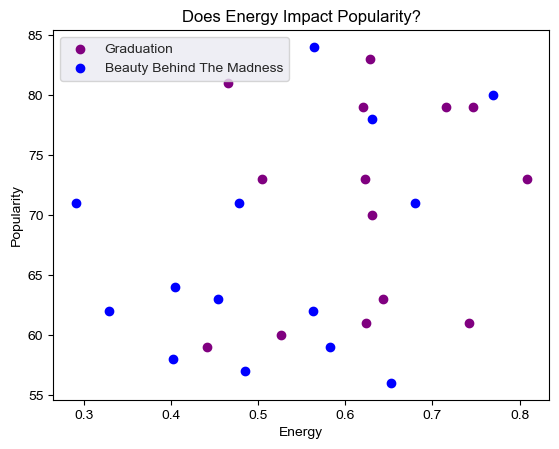

In [29]:
fig1, ax1 = plt.subplots()
ax1.scatter(ye['energy'], ye['popularity'], color = 'purple')
ax1.scatter(tw['energy'], tw['popularity'], color = 'blue')
ax1.set_xlabel('Energy')
ax1.set_ylabel('Popularity')
plt.style.use('seaborn-v0_8-darkgrid')
ax1.set_title('Does Energy Impact Popularity?')
ax1.legend(['Graduation', 'Beauty Behind The Madness'], loc = 'upper left', frameon = 'true')

plt.show()

In [30]:
fit1 = smf.ols('energy ~ popularity', data = artist_compare).fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     3.274
Date:                Sun, 24 Nov 2024   Prob (F-statistic):             0.0820
Time:                        22:00:28   Log-Likelihood:                 18.988
No. Observations:                  28   AIC:                            -33.98
Df Residuals:                      26   BIC:                            -31.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2301      0.190      1.209      0.237      -0.161       0.621
popularity     0.0050      0.003      1.809      0.082      -0.001       0.011
==============================================================================
Omnibus:                        0.558   Durbin-Watson:                   2.276
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.620
Skew:                          -0.289   Prob(JB):                        0.734
Kurtosis:                       2.556   Cond. No.                         549.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
correlation = artist_compare['energy'].corr(artist_compare['popularity'])
print(correlation)

0.33442763907117956


My conclusion is that there was no real evidence of a correlation between energy and popularity at least in the data set I decided to use. I really enjoyed this project as it allowed me to really see how far I've come in even being comfortable with data. I wanted to do a line graph or scatter plot in the notebook but we still don't know how so I did my own on a separate platform. It made me certain that my theory was wrong and was significantly easier to consume and process. I had no real desire for my theory to be proven or disproven I more so just wanted to work it out and go through the process of figuring it out. I will likely add a submission comment with the picture of the graph I made. I believe a more diverse data set like a playlist might have made this project more fun and may have even proven my hypothesis, that would be a great pivot for the future.

** UPDATED ** 
I added more information about why I chose these albums and why I thought energy could lead to increased popularity in tracks. I changed the code a bit to only read in the key files once. I commented out the access code so no one could do anything malicious with it. I got a summary of the stats as well as analyzed the correlation stats. The correlation showed a very very slight positive correlation which would mean that more energy would make the songs more popular. This proves my hypothesis but with the correlation so low, at 0.33 with 1.0 being a perfect positive correlation, I would say the correlation is non conclusive. Overall I think my hypothesis overall could have been more in-depth, it would have allowed me to do more with this project especially with the graphing and figures. If I could do it again that would be the first thing I would change.